In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Calculating the values of Duty Cycle and capacity of the battery

In [3]:
timeSleep = (29 % 50 + 5)
print (timeSleep, "seconds")

JBattery= 4229%5000+15000
print(JBattery, "Joule")

34 seconds
19229 Joule


Using deep_sleep.csv as dataset to calculate the average values

In [4]:
dataset = pd.read_csv('deep_sleep.csv')

misurations = dataset["Data"]

avg_Deep_Sleep_Power = misurations[misurations < 100].mean().round(3)
print("avg_Deep_Sleep_Power: ",avg_Deep_Sleep_Power, "mW")

avg_IdleDP_Power = misurations[misurations > 300][misurations < 400].mean().round(3)
print("avg_Idle_Power: ",avg_IdleDP_Power, "mW")

avg_WIFI_ON_Power = misurations[misurations> 700].mean().round(3)
print("avg_WIFI_ON_Power: ",avg_WIFI_ON_Power, "mW")



avg_Deep_Sleep_Power:  59.661 mW
avg_Idle_Power:  311.672 mW
avg_WIFI_ON_Power:  775.489 mW


Using sensor_read.csv as dataset to calculate the average values

In [5]:
dataset = pd.read_csv('sensor_read.csv')

misurations = dataset["Data"]

avg_IdleSR_Power = misurations[misurations >= 330][misurations <= 350].mean().round(3)
print("avg_Idle_Power: ",avg_IdleSR_Power, "mW")

avg_Reading_Power = misurations[misurations >= 450][misurations <= 470].mean().round(3)
print("avg_Reading_Power: ",avg_Reading_Power, "mW")





avg_Idle_Power:  331.586 mW
avg_Reading_Power:  466.745 mW


Using transmission_power.csv as dataset to calculate the average values

In [6]:
dataset = pd.read_csv('transmission_power.csv')

misurations = dataset["Data"]

avg_Transmssion_Power_2dBm = misurations[misurations >= 750][misurations <=850].mean().round(3)
print("avg_Transmission_Power: ",avg_Transmssion_Power_2dBm, "mW")


avg_Transmission_Power:  797.294 mW


Printing the average powers previously calculated

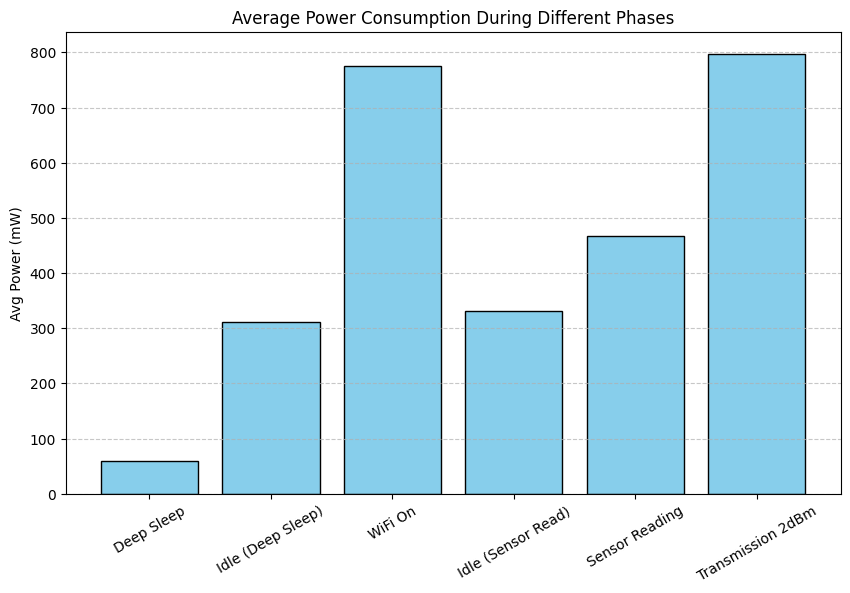

In [7]:

labels = [
    'Deep Sleep', 
    'Idle (Deep Sleep)', 
    'WiFi On', 
    'Idle (Sensor Read)', 
    'Sensor Reading', 
    'Transmission 2dBm'
]


values = [
    avg_Deep_Sleep_Power, 
    avg_IdleDP_Power, 
    avg_WIFI_ON_Power, 
    avg_IdleSR_Power, 
    avg_Reading_Power, 
    avg_Transmssion_Power_2dBm
]


plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue', edgecolor='black')

# Aggiunta di etichette
plt.title('Average Power Consumption During Different Phases')
plt.ylabel('Avg Power (mW)')
plt.xticks(rotation=30) 

# Mostra il grafico
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


This section is defined to import a CSV generated from the simulations containing the time values of the different phases, we used the most commons values for each phase

In [8]:

from collections import Counter

df = pd.read_csv('logs.csv')

def most_common_value(group):
    counter = Counter(group)
    return counter.most_common(1)[0][0]  

most_common_values = df.groupby("Type")["Value"].apply(most_common_value).to_dict()

boot_time_value = most_common_values.get("BOOT TIME", None)
misuration_value = most_common_values.get("MISURATION", None)
wifi_turned_on_value = most_common_values.get("WIFI TURNED ON", None)
message_sent_value = most_common_values.get("MESSAGE SENT", None)
wifi_turned_off_value = most_common_values.get("WIFI TURNED OFF", None)

print ("BOOT TIME", boot_time_value, "microseconds")
print ("MISURATION TIME", misuration_value, "microseconds")
print ("WIFI ON TIME", wifi_turned_on_value, "microseconds")
print ("MESSAGE SENT TIME", message_sent_value, "microseconds")
print ("WIFI OFF TIME", wifi_turned_off_value, "microseconds")


BOOT TIME 882 microseconds
MISURATION TIME 7355 microseconds
WIFI ON TIME 190526 microseconds
MESSAGE SENT TIME 1190065 microseconds
WIFI OFF TIME 1196262 microseconds


DEEP SLEEP  2.028474 Joule
IDLE  0.00027489470400000003 Joule
WIFI ON  0.7799372049040001 Joule
TRANSMISSION:  0.796926447466 Joule
Total energy in a cycle 3.6086337874590004 Joule


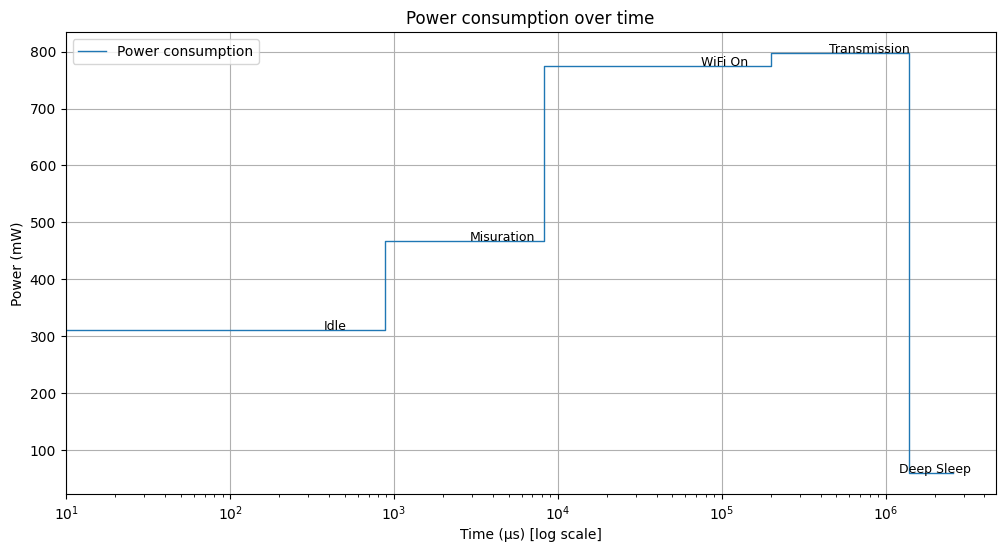

In [9]:
import numpy as np
energy_in_idle = boot_time_value * avg_IdleDP_Power *1e-9
energy_in_misuration = avg_Reading_Power * (misuration_value - boot_time_value) *1e-9
energy_in_wifi_on = avg_WIFI_ON_Power * (wifi_turned_off_value - wifi_turned_on_value) *1e-9
energy_trasmission = avg_Transmssion_Power_2dBm * (message_sent_value - wifi_turned_on_value) *1e-9
energy_deep_sleep = avg_Deep_Sleep_Power * timeSleep *1e-3

total_energy = energy_in_idle + energy_in_misuration + energy_in_wifi_on + energy_trasmission + energy_deep_sleep
print("DEEP SLEEP ", energy_deep_sleep, "Joule")
print("IDLE ", energy_in_idle, "Joule")
print("WIFI ON ",energy_in_wifi_on, "Joule")
print("TRANSMISSION: ", energy_trasmission, "Joule")

print("Total energy in a cycle", total_energy, "Joule")

# Dati di ingresso
phases = ['Idle', 'Misuration', 'WiFi On', 'Transmission', 'Deep Sleep']
times = [boot_time_value, misuration_value, wifi_turned_on_value, message_sent_value, wifi_turned_off_value] # in µs
powers = [avg_IdleDP_Power, avg_Reading_Power, avg_WIFI_ON_Power, avg_Transmssion_Power_2dBm, avg_Deep_Sleep_Power] # in mW

# Genera il tempo cumulativo per ogni fase
time_points = np.cumsum([0] + times)

# Numero di punti per interpolazione per ogni fase
points_per_phase = 50

time_signal = []
power_signal = []

for i in range(len(phases)):
    # Genera punti interpolati per ogni fase
    t = np.linspace(time_points[i], time_points[i + 1], points_per_phase)
    p = np.full_like(t, powers[i])

    time_signal.extend(t)
    power_signal.extend(p)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time_signal, power_signal, label='Power consumption', linewidth=1)

# Imposta scala logaritmica per migliorare la distribuzione dei punti temporali
plt.xscale('log')

# Evidenzia le diverse fasi
for i, phase in enumerate(phases):
    mid_point = (time_points[i] + time_points[i + 1]) / 2
    plt.text(mid_point, powers[i] + 0.1, phase, ha='center', fontsize=9)

# Etichette e titolo
plt.xlabel('Time (µs) [log scale]')
plt.ylabel('Power (mW)')
plt.title('Power consumption over time')
plt.grid(True)
plt.legend()
plt.show()






In [ ]:
total_number_cycles = JBattery / total_energy

print("Number of cycles", total_number_cycles)

total_time_sec = total_number_cycles * (timeSleep + (wifi_turned_off_value*1e-6))
print("total time in sec", total_time_sec, "sec")
print("total time in hour", total_time_sec/3600)


#Improved version whith a 60 seconds of deep sleep

energy_deep_sleep = avg_Deep_Sleep_Power * 60 *1e-3
total_energy = energy_in_idle + energy_in_misuration + energy_in_wifi_on + energy_trasmission + energy_deep_sleep
print("Totale energy in improved version", total_energy, "J")
total_number_cycles_v2 = JBattery / total_energy

print("Number of cycles", total_number_cycles_v2)

total_time_sec = total_number_cycles * (60 + (wifi_turned_off_value*1e-6))

print("total time in sec", total_time_sec, "sec")
print("total time in hour", total_time_sec/3600)





Number of cycles 5328.609421888718
total time in sec 187547.13330846385 sec
total time in hour 52.09642591901773
Totale energy in improved version 5.159819787459 J
Number of cycles 3726.680541583313
total time in sec 326090.9782775705 sec
total time in hour 90.58082729932514
